**Desadio que tem como objetivo classificar se o aluno está participando do enem 2016 como treineiro**

## Adicionando bibliotecas e dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline

**Após análise ao dicionário foram escolhidas as respectivas features para classificação do aluno treineiro.**

- **NU_IDADE:** Idade do participante

- **TP_ST_CONCLUSAO:** Situação de conclusão do Ensino Médio
    - 1: Já concluí o Ensino Médio
    - 2: Estou cursando e concluirei o Ensino Médio em 2016
    - 3: Estou cursando e concluirei o Ensino Médio após 2016
    - 4: Não concluí e não estou cursando o Ensino Médio
    
- **TP_ANO_CONCLUIU:** Ano de Conclusão do Ensino Médio
    - 0: Não informado
    - 1: 2015
    - 2: 2014
    - 3: 2013
    - 4: 2012
    - 5: 2011
    - 6: 2010
    - 7: 2009
    - 8: 2008
    - 9: 2007
    - 10: Anterior a 2007

- **IN_TREINEIRO:** Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
    - 0: Não é treineiro
    - 1: é treineiro

In [2]:
cols_train = ['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO']
cols_test = ['NU_INSCRICAO', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']

In [3]:
df_train = pd.read_csv('train.csv', usecols= cols_train)
df_test = pd.read_csv('test.csv', usecols= cols_test)

## Análise Exploratória

In [4]:
df_train.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO
0,24,1,4,0
1,17,2,0,0
2,21,3,0,0
3,25,1,9,0
4,28,1,4,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   NU_IDADE         13730 non-null  int64
 1   TP_ST_CONCLUSAO  13730 non-null  int64
 2   TP_ANO_CONCLUIU  13730 non-null  int64
 3   IN_TREINEIRO     13730 non-null  int64
dtypes: int64(4)
memory usage: 429.2 KB


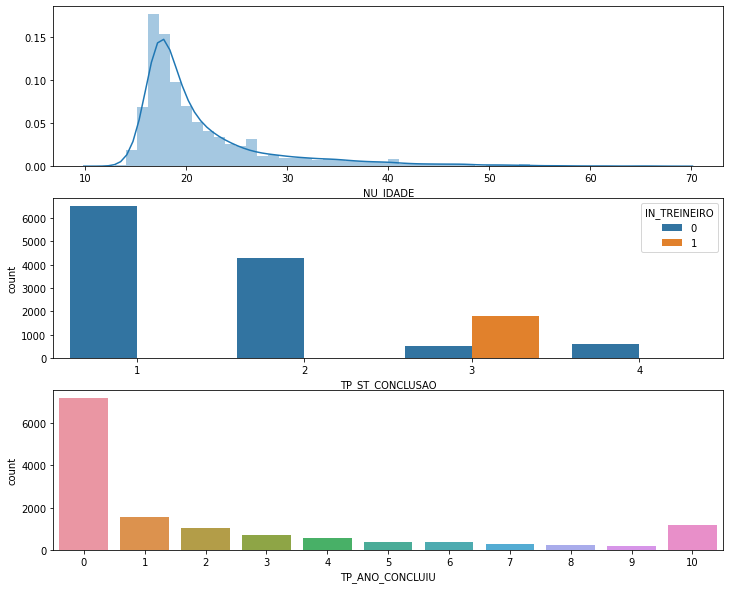

In [6]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1)
sns.distplot(df_train['NU_IDADE']);

plt.subplot(3, 1, 2)
sns.countplot(x = 'TP_ST_CONCLUSAO', hue= 'IN_TREINEIRO', data= df_train, );

plt.subplot(3, 1, 3)
sns.countplot(x= 'TP_ANO_CONCLUIU', data= df_train);

## Verificar balanceamento dos dados

In [7]:
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

Observado que existe um desbalanceamento, existem poucos alunos treineiros

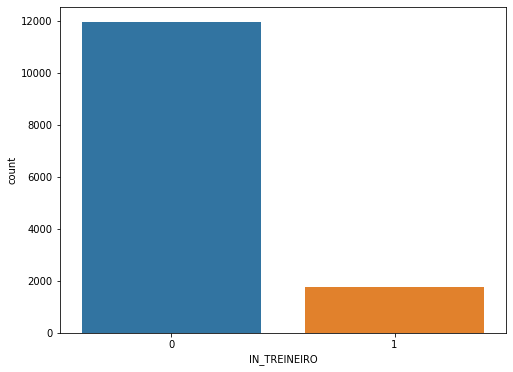

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(df_train['IN_TREINEIRO']);

Balanceamento dos dados utilizando o metódo SMOTE com a estratégia de aumentar a quantidade de dados da classe minoritária

In [9]:
smote = SMOTE(sampling_strategy="minority")

In [10]:
X_smote, y_smote = smote.fit_resample(X= df_train.iloc[:, :-1], y= df_train.iloc[:, -1])

Verificação e ilustração dos dados após balanceamento

In [11]:
y_smote.value_counts()

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

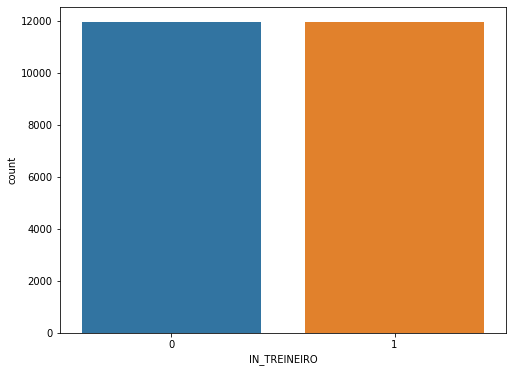

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(y_smote);

## Machine Learning

Separação dos dados

In [13]:
data = X_smote
target = y_smote
test = df_test.drop(labels= 'NU_INSCRICAO', axis= 1)

### Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(max_depth= 100, n_jobs= 3)

In [15]:
#treinando os dados
rfc.fit(data, target)

RandomForestClassifier(max_depth=100, n_jobs=3)

### Verificação das métricas

In [16]:
data_pred = rfc.predict(data)

In [17]:
print(classification_report(target, data_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11947
           1       0.98      1.00      0.99     11947

    accuracy                           0.99     23894
   macro avg       0.99      0.99      0.99     23894
weighted avg       0.99      0.99      0.99     23894



In [18]:
print(pd.crosstab(target, data_pred, rownames=['real'], colnames=['      predito']))

      predito      0      1
real                       
0              11741    206
1                  0  11947


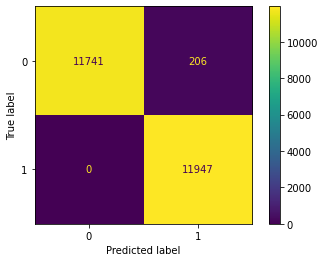

In [19]:
plt.figaspect
plot_confusion_matrix(rfc,data, target);

### Predizendo os dados de teste

In [20]:
result = rfc.predict(test)

## Exportando resultado

In [21]:
answer = pd.DataFrame(data= df_test['NU_INSCRICAO'])
answer['IN_TREINEIRO'] = result

In [22]:
answer.to_csv('answer.csv', index= False)

In [23]:
verificad = pd.read_csv('answer.csv')

In [24]:
verificad

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [25]:
verificad['IN_TREINEIRO'].value_counts()

0    3936
1     634
Name: IN_TREINEIRO, dtype: int64

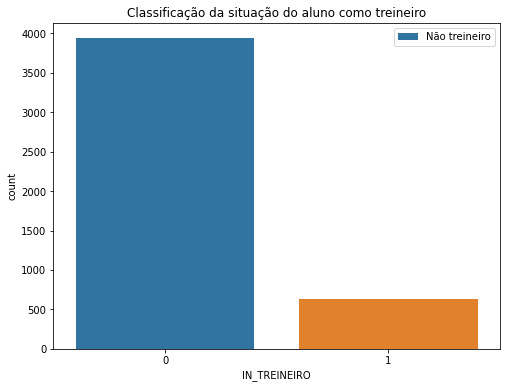

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'IN_TREINEIRO', data= verificad)
plt.title('Classificação da situação do aluno como treineiro', )
plt.legend(labels=['Não treineiro'])

Com esta abordagem obtive um score de 98.73%